## Лабораторная работа 1. Линейная регрессия и факторный анализ
### Цель работы: изучение основ линейной регрессии, построение простейших моделей регрессии, проведение обучения модели на реальных данных и оценка её качество.
### Выбранный датасет: 
### Wine Quality


## План анализа данных
## Выполним:
### 1. Первичный анализ
- Дескриптивная статистика
- Анализ распределений
### 2. Визуализация
- Построение гистограмм
- Анализ распределения целевой переменной
### 3. Матрица корреляций
- Построение матрицы корреляций
- Анализ корреляционных зависимостей
### 4. Предобработка данных
- Проверка на наличие пропущенных значений

ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ
1. ПРОВЕРКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ:
Количество пропусков по колонкам:
fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
target                  0
dtype: int64

Общее количество пропусков: 0
Процент пропусков: 0.00%

2. ДЕСКРИПТИВНАЯ СТАТИСТИКА:
Размер данных: (6497, 12)
Количество наблюдений: 6497
Количество признаков: 12

Типы данных:
fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
target                    int64
dtype: object

Стати

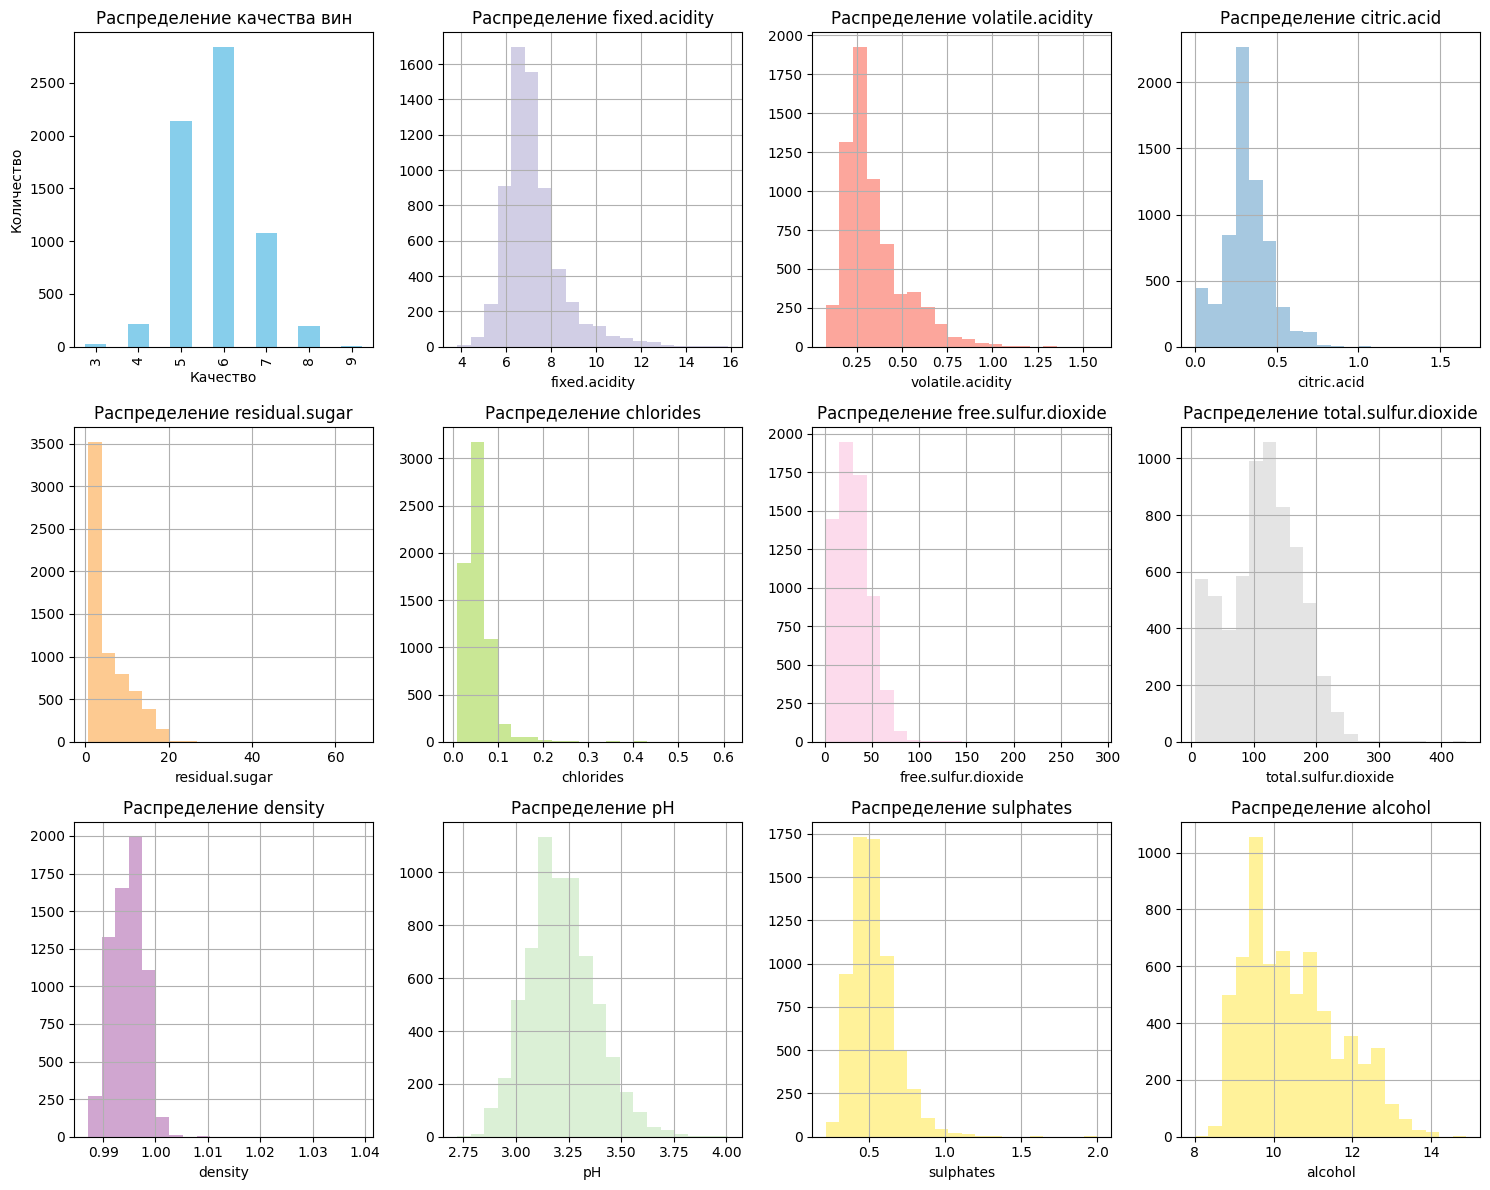


5. МАТРИЦА КОРРЕЛЯЦИЙ:
Матрица корреляций:
                      fixed.acidity  volatile.acidity  citric.acid  \
fixed.acidity                 1.000             0.219        0.324   
volatile.acidity              0.219             1.000       -0.378   
citric.acid                   0.324            -0.378        1.000   
residual.sugar               -0.112            -0.196        0.142   
chlorides                     0.298             0.377        0.039   
free.sulfur.dioxide          -0.283            -0.353        0.133   
total.sulfur.dioxide         -0.329            -0.414        0.195   
density                       0.459             0.271        0.096   
pH                           -0.253             0.261       -0.330   
sulphates                     0.300             0.226        0.056   
alcohol                      -0.095            -0.038       -0.010   
target                       -0.077            -0.266        0.086   

                      residual.sugar  chlorid

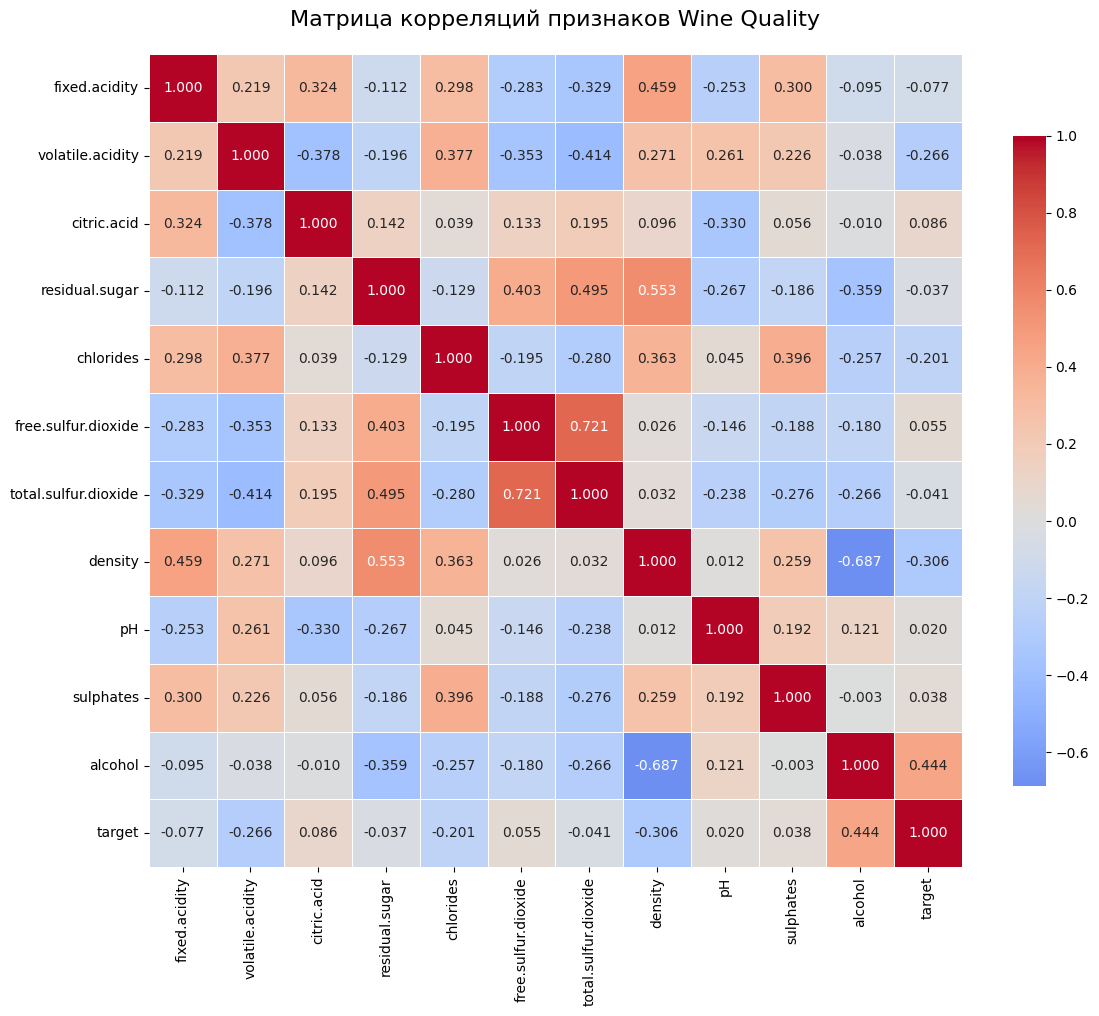


АНАЛИЗ СИЛЬНЫХ КОРРЕЛЯЦИЙ (|r| > 0.7):
free.sulfur.dioxide - total.sulfur.dioxide: 0.721 (очень сильная положительная)

ВЫВОДЫ:
- Пропущенные значения отсутствуют
- Данные готовы для дальнейшего анализа
- Обнаружены сильные корреляции между некоторыми признаками
- Целевая переменная имеет неравномерное распределение


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

print("ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ")
print("=" * 50)

# Загрузка данных
wine_quality = fetch_openml('wine_quality', version=1, as_frame=True)
df = wine_quality.frame

# Переименуем целевую переменную
df = df.rename(columns={'quality': 'target'})

# 1. Предобработка - проверка пропусков
print("1. ПРОВЕРКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ:")
print("=" * 40)
print("Количество пропусков по колонкам:")
print(df.isnull().sum())
print(f"\nОбщее количество пропусков: {df.isnull().sum().sum()}")
print(f"Процент пропусков: {df.isnull().sum().sum() / len(df) * 100:.2f}%")

# 2. Дескриптивная статистика
print("\n2. ДЕСКРИПТИВНАЯ СТАТИСТИКА:")
print("=" * 40)
print(f"Размер данных: {df.shape}")
print(f"Количество наблюдений: {len(df)}")
print(f"Количество признаков: {len(df.columns)}")

print("\nТипы данных:")
print(df.dtypes)

print("\nСтатистическое описание числовых признаков:")
print(df.describe())

# 3. Распределение целевой переменной
print("\n3. РАСПРЕДЕЛЕНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ:")
print("=" * 40)
target_distribution = df['target'].value_counts().sort_index()
print("Распределение качества вин:")
print(target_distribution)
print("\nПроцентное соотношение:")
target_percentages = (df['target'].value_counts(normalize=True).sort_index() * 100).round(2)
print(target_percentages)

# 4. Визуализация распределений
print("\n4. ВИЗУАЛИЗАЦИЯ РАСПРЕДЕЛЕНИЙ:")
print("=" * 40)

# Распределение целевой переменной
plt.figure(figsize=(15, 12))

plt.subplot(3, 4, 1)
df['target'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Распределение качества вин')
plt.xlabel('Качество')
plt.ylabel('Количество')

# Распределение числовых признаков
numeric_columns = ['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 
                   'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
                   'pH', 'sulphates', 'alcohol']

for i, col in enumerate(numeric_columns[:11], 2):
    plt.subplot(3, 4, i)
    df[col].hist(bins=20, alpha=0.7, color=plt.cm.Set3(i/12))
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

# 5. Матрица корреляций
print("\n5. МАТРИЦА КОРРЕЛЯЦИЙ:")
print("=" * 40)

# Выбираем только числовые колонки
numeric_df = df[numeric_columns + ['target']]
correlation_matrix = numeric_df.corr()

print("Матрица корреляций:")
print(correlation_matrix.round(3))

# Визуализация тепловой карты корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Матрица корреляций признаков Wine Quality', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Анализ сильных корреляций
print("\nАНАЛИЗ СИЛЬНЫХ КОРРЕЛЯЦИЙ (|r| > 0.7):")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            strong_correlations.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                corr_val
            ))

for var1, var2, corr in strong_correlations:
    strength = "очень сильная" if abs(corr) > 0.7 else "сильная"
    direction = "положительная" if corr > 0 else "отрицательная"
    print(f"{var1} - {var2}: {corr:.3f} ({strength} {direction})")

print("\nВЫВОДЫ:")
print("- Пропущенные значения отсутствуют")
print("- Данные готовы для дальнейшего анализа")
print("- Обнаружены сильные корреляции между некоторыми признаками")
print("- Целевая переменная имеет неравномерное распределение")

Проведем VIF анализ мультиколлинеарности

АНАЛИЗ МУЛЬТИКОЛЛИНЕАРНОСТИ (VIF)
VIF коэффициенты для признаков:
                Variable    VIF
1          fixed.acidity   4.90
2       volatile.acidity   1.95
3            citric.acid   1.61
4         residual.sugar   7.23
5              chlorides   1.63
6    free.sulfur.dioxide   2.14
7   total.sulfur.dioxide   2.94
8                density  15.91
9                     pH   2.54
10             sulphates   1.54
11               alcohol   4.78

АНАЛИЗ МУЛЬТИКОЛЛИНЕАРНОСТИ:
Признаки с ВЫСОКОЙ мультиколлинеарностью (VIF > 10): 1
  - density: VIF = 15.91

Признаки с УМЕРЕННОЙ мультиколлинеарностью (5 < VIF ≤ 10): 1
  - residual.sugar: VIF = 7.23

Признаки с НИЗКОЙ мультиколлинеарностью (VIF ≤ 5): 9
  - fixed.acidity: VIF = 4.90
  - volatile.acidity: VIF = 1.95
  - citric.acid: VIF = 1.61
  - chlorides: VIF = 1.63
  - free.sulfur.dioxide: VIF = 2.14
  - total.sulfur.dioxide: VIF = 2.94
  - pH: VIF = 2.54
  - sulphates: VIF = 1.54
  - alcohol: VIF = 4.78


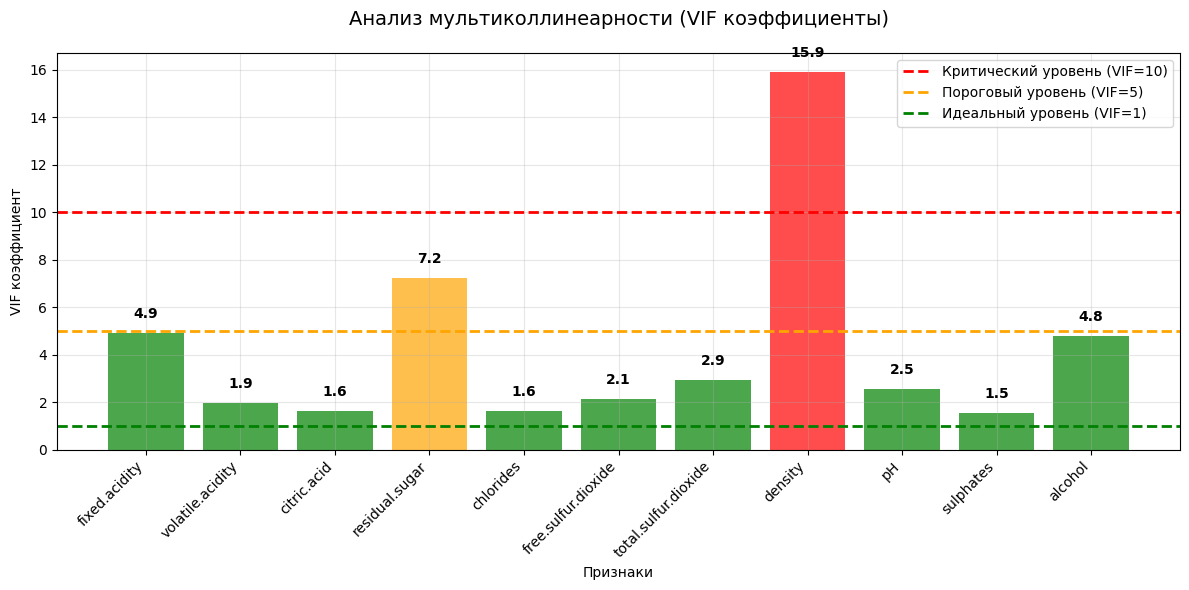


ВЫВОДЫ:
Обнаружена серьезная мультиколлинеарность!
Есть признаки с умеренной мультиколлинеарностью


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

print("АНАЛИЗ МУЛЬТИКОЛЛИНЕАРНОСТИ (VIF)")
print("=" * 50)

# Подготовка данных для VIF анализа
numeric_columns = ['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 
                   'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
                   'pH', 'sulphates', 'alcohol']

X = df[numeric_columns]

# Добавляем константу для VIF расчета
X_with_const = add_constant(X)

# Расчет VIF для каждого признака
vif_data = pd.DataFrame()
vif_data['Variable'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]

# Убираем константу из результатов
vif_data = vif_data[vif_data['Variable'] != 'const']

print("VIF коэффициенты для признаков:")
print("=" * 40)
print(vif_data.round(2))

# Анализ результатов
print("\nАНАЛИЗ МУЛЬТИКОЛЛИНЕАРНОСТИ:")
print("=" * 40)

# Классификация по уровню мультиколлинеарности
high_vif = vif_data[vif_data['VIF'] > 10]
medium_vif = vif_data[(vif_data['VIF'] > 5) & (vif_data['VIF'] <= 10)]
low_vif = vif_data[vif_data['VIF'] <= 5]

print(f"Признаки с ВЫСОКОЙ мультиколлинеарностью (VIF > 10): {len(high_vif)}")
if len(high_vif) > 0:
    for _, row in high_vif.iterrows():
        print(f"  - {row['Variable']}: VIF = {row['VIF']:.2f}")

print(f"\nПризнаки с УМЕРЕННОЙ мультиколлинеарностью (5 < VIF ≤ 10): {len(medium_vif)}")
if len(medium_vif) > 0:
    for _, row in medium_vif.iterrows():
        print(f"  - {row['Variable']}: VIF = {row['VIF']:.2f}")

print(f"\nПризнаки с НИЗКОЙ мультиколлинеарностью (VIF ≤ 5): {len(low_vif)}")
if len(low_vif) > 0:
    for _, row in low_vif.iterrows():
        print(f"  - {row['Variable']}: VIF = {row['VIF']:.2f}")

# Визуализация VIF
plt.figure(figsize=(12, 6))
colors = ['red' if vif > 10 else 'orange' if vif > 5 else 'green' for vif in vif_data['VIF']]
bars = plt.bar(vif_data['Variable'], vif_data['VIF'], color=colors, alpha=0.7)

plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label='Критический уровень (VIF=10)')
plt.axhline(y=5, color='orange', linestyle='--', linewidth=2, label='Пороговый уровень (VIF=5)')
plt.axhline(y=1, color='green', linestyle='--', linewidth=2, label='Идеальный уровень (VIF=1)')

plt.title('Анализ мультиколлинеарности (VIF коэффициенты)', fontsize=14, pad=20)
plt.xlabel('Признаки')
plt.ylabel('VIF коэффициент')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, vif in zip(bars, vif_data['VIF']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{vif:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nВЫВОДЫ:")
print("=" * 40)
if len(high_vif) > 0:
    print("Обнаружена серьезная мультиколлинеарность!")
else:
    print("Серьезной мультиколлинеарности не обнаружено")

if len(medium_vif) > 0:
    print("Есть признаки с умеренной мультиколлинеарностью")

Теперь сделаем Регрессионные модели - линейная, гребневая + метрик

ПОСТРОЕНИЕ РЕГРЕССИОННЫХ МОДЕЛЕЙ
Размер тренировочной выборки: (5197, 11)
Размер тестовой выборки: (1300, 11)
1. ЛИНЕЙНАЯ РЕГРЕССИЯ

Линейная регрессия:
----------------------------------------
ТРЕНИРОВОЧНАЯ ВЫБОРКА:
RMSE: 0.7338
R²: 0.2993
MAPE: 10.12%

ТЕСТОВАЯ ВЫБОРКА:
RMSE: 0.7394
R²: 0.2598
MAPE: 10.08%

КРОСС-ВАЛИДАЦИЯ (R²):
Среднее: 0.2952 (+/- 0.0203)

2. ГРЕБНЕВАЯ РЕГРЕССИЯ (RIDGE)
Оптимальный параметр alpha: 0.001

Гребневая регрессия:
----------------------------------------
ТРЕНИРОВОЧНАЯ ВЫБОРКА:
RMSE: 0.7339
R²: 0.2991
MAPE: 10.12%

ТЕСТОВАЯ ВЫБОРКА:
RMSE: 0.7392
R²: 0.2601
MAPE: 10.08%

КРОСС-ВАЛИДАЦИЯ (R²):
Среднее: 0.2953 (+/- 0.0194)

3. СРАВНЕНИЕ МОДЕЛЕЙ
Сравнение метрик на тестовой выборке:
                     rmse_test  r2_test  mape_test  cv_mean
model                                                      
Линейная регрессия      0.7394   0.2598    10.0828   0.2952
Гребневая регрессия     0.7392   0.2601    10.0823   0.2953


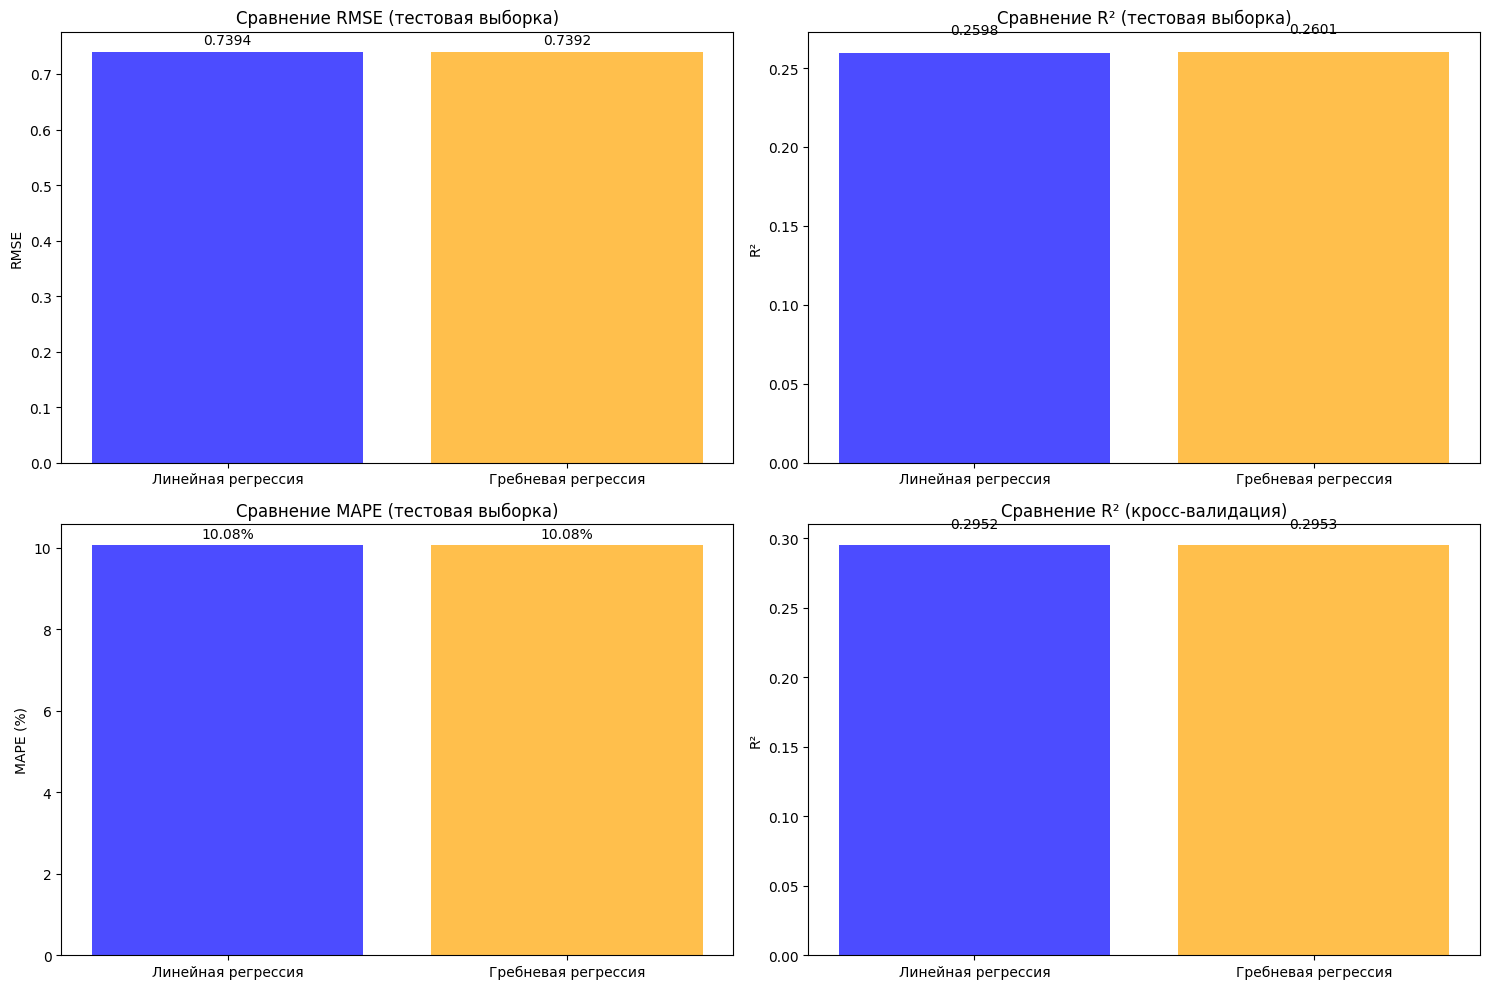


4. АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ (Линейная регрессия)
Коэффициенты линейной регрессии:
                 feature  coefficient  abs_coefficient
7                density     -58.9451          58.9451
1       volatile.acidity      -1.3508           1.3508
9              sulphates       0.8084           0.8084
8                     pH       0.4828           0.4828
4              chlorides      -0.3328           0.3328
10               alcohol       0.2707           0.2707
2            citric.acid      -0.1438           0.1438
0          fixed.acidity       0.0790           0.0790
3         residual.sugar       0.0459           0.0459
5    free.sulfur.dioxide       0.0070           0.0070
6   total.sulfur.dioxide      -0.0027           0.0027


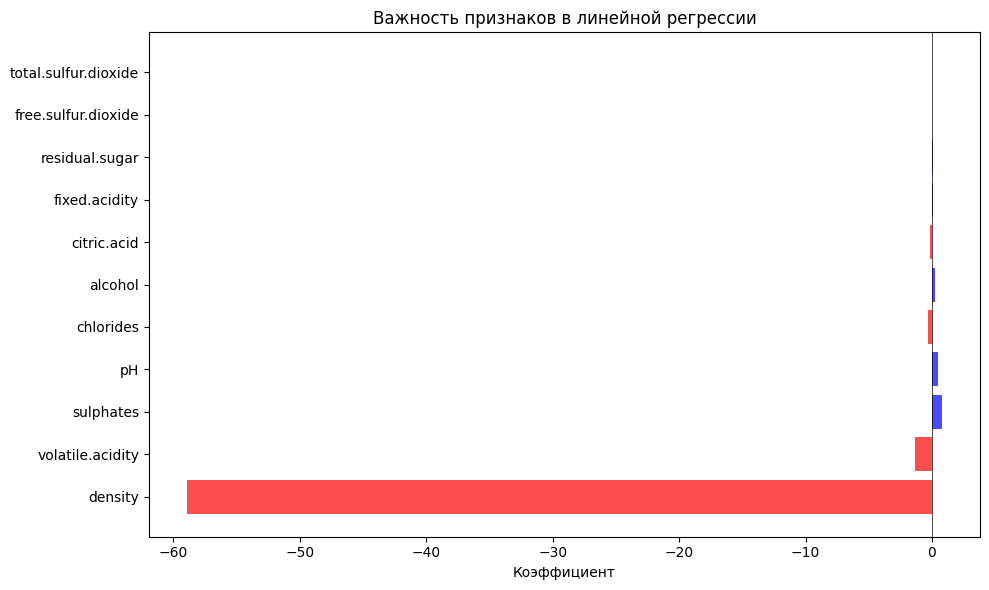


ВЫВОДЫ:
Лучшая модель: Гребневая регрессия
R² на тестовой выборке: 0.2601
MAPE: 10.08%


In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

print("ПОСТРОЕНИЕ РЕГРЕССИОННЫХ МОДЕЛЕЙ")
print("=" * 50)

# Подготовка данных
X = df[numeric_columns]
y = df['target']

# Разделение на тренировочную и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

# Функция для расчета MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Функция для оценки модели
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Обучение модели
    model.fit(X_train, y_train)
    
    # Предсказания
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Метрики для тренировочной выборки
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_train = r2_score(y_train, y_pred_train)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    
    # Метрики для тестовой выборки
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
    
    # Кросс-валидация
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    print(f"\n{model_name}:")
    print("-" * 40)
    print("ТРЕНИРОВОЧНАЯ ВЫБОРКА:")
    print(f"RMSE: {rmse_train:.4f}")
    print(f"R²: {r2_train:.4f}")
    print(f"MAPE: {mape_train:.2f}%")
    
    print("\nТЕСТОВАЯ ВЫБОРКА:")
    print(f"RMSE: {rmse_test:.4f}")
    print(f"R²: {r2_test:.4f}")
    print(f"MAPE: {mape_test:.2f}%")
    
    print(f"\nКРОСС-ВАЛИДАЦИЯ (R²):")
    print(f"Среднее: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    return {
        'model': model_name,
        'rmse_train': rmse_train,
        'r2_train': r2_train,
        'mape_train': mape_train,
        'rmse_test': rmse_test,
        'r2_test': r2_test,
        'mape_test': mape_test,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }

# 1. Линейная регрессия
print("1. ЛИНЕЙНАЯ РЕГРЕССИЯ")
print("=" * 30)
linear_model = LinearRegression()
linear_results = evaluate_model(linear_model, X_train, X_test, y_train, y_test, "Линейная регрессия")

# 2. Гребневая регрессия (Ridge)
print("\n2. ГРЕБНЕВАЯ РЕГРЕССИЯ (RIDGE)")
print("=" * 30)

# Подбор оптимального alpha с помощью кросс-валидации
from sklearn.linear_model import RidgeCV

# Сетка параметров для alpha
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

print(f"Оптимальный параметр alpha: {ridge_cv.alpha_}")

ridge_model = Ridge(alpha=ridge_cv.alpha_)
ridge_results = evaluate_model(ridge_model, X_train, X_test, y_train, y_test, "Гребневая регрессия")

# Сравнение моделей
print("\n3. СРАВНЕНИЕ МОДЕЛЕЙ")
print("=" * 30)

results_df = pd.DataFrame([linear_results, ridge_results])
results_df = results_df.set_index('model')

print("Сравнение метрик на тестовой выборке:")
comparison = results_df[['rmse_test', 'r2_test', 'mape_test', 'cv_mean']].round(4)
print(comparison)

# Визуализация сравнения моделей
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# RMSE сравнение
axes[0,0].bar(results_df.index, results_df['rmse_test'], color=['blue', 'orange'], alpha=0.7)
axes[0,0].set_title('Сравнение RMSE (тестовая выборка)')
axes[0,0].set_ylabel('RMSE')
for i, v in enumerate(results_df['rmse_test']):
    axes[0,0].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

# R² сравнение
axes[0,1].bar(results_df.index, results_df['r2_test'], color=['blue', 'orange'], alpha=0.7)
axes[0,1].set_title('Сравнение R² (тестовая выборка)')
axes[0,1].set_ylabel('R²')
for i, v in enumerate(results_df['r2_test']):
    axes[0,1].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

# MAPE сравнение
axes[1,0].bar(results_df.index, results_df['mape_test'], color=['blue', 'orange'], alpha=0.7)
axes[1,0].set_title('Сравнение MAPE (тестовая выборка)')
axes[1,0].set_ylabel('MAPE (%)')
for i, v in enumerate(results_df['mape_test']):
    axes[1,0].text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom')

# Кросс-валидация сравнение
axes[1,1].bar(results_df.index, results_df['cv_mean'], color=['blue', 'orange'], alpha=0.7)
axes[1,1].set_title('Сравнение R² (кросс-валидация)')
axes[1,1].set_ylabel('R²')
for i, v in enumerate(results_df['cv_mean']):
    axes[1,1].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Анализ важности признаков для линейной модели
print("\n4. АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ (Линейная регрессия)")
print("=" * 50)

feature_importance = pd.DataFrame({
    'feature': numeric_columns,
    'coefficient': linear_model.coef_,
    'abs_coefficient': np.abs(linear_model.coef_)
}).sort_values('abs_coefficient', ascending=False)

print("Коэффициенты линейной регрессии:")
print(feature_importance.round(4))

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
colors = ['red' if coef < 0 else 'blue' for coef in feature_importance['coefficient']]
plt.barh(feature_importance['feature'], feature_importance['coefficient'], color=colors, alpha=0.7)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.title('Важность признаков в линейной регрессии')
plt.xlabel('Коэффициент')
plt.tight_layout()
plt.show()

print("\nВЫВОДЫ:")
print("=" * 40)
best_model = results_df.loc[results_df['r2_test'].idxmax()]
print(f"Лучшая модель: {best_model.name}")
print(f"R² на тестовой выборке: {best_model['r2_test']:.4f}")
print(f"MAPE: {best_model['mape_test']:.2f}%")

Выполним PCA + повторное моделирование

АНАЛИЗ МЕТОДОМ ГЛАВНЫХ КОМПОНЕНТ (PCA)
1. СТАНДАРТИЗАЦИЯ ДАННЫХ
------------------------------
Данные стандартизированы (среднее=0, std=1)

2. ПРИМЕНЕНИЕ PCA
------------------------------
Объясненная дисперсия по компонентам:
Компонента 1: 0.275 (Накопленно: 0.275)
Компонента 2: 0.229 (Накопленно: 0.503)
Компонента 3: 0.142 (Накопленно: 0.645)
Компонента 4: 0.088 (Накопленно: 0.733)
Компонента 5: 0.066 (Накопленно: 0.799)
Компонента 6: 0.055 (Накопленно: 0.853)
Компонента 7: 0.047 (Накопленно: 0.901)
Компонента 8: 0.046 (Накопленно: 0.946)
Компонента 9: 0.030 (Накопленно: 0.977)
Компонента 10: 0.020 (Накопленно: 0.997)
Компонента 11: 0.003 (Накопленно: 1.000)

Количество компонент для 95% дисперсии: 9


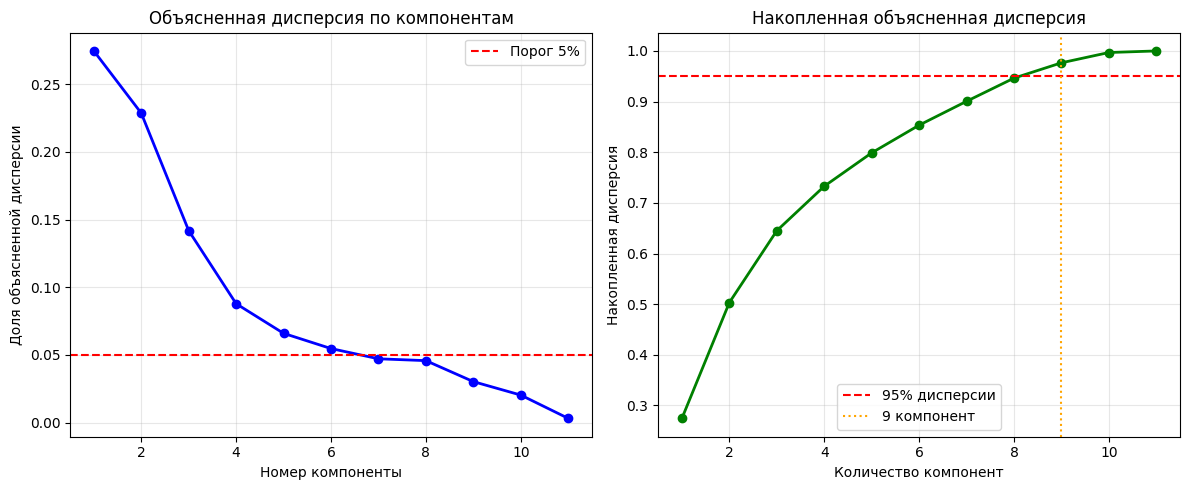


3. МОДЕЛИРОВАНИЕ НА ГЛАВНЫХ КОМПОНЕНТАХ
----------------------------------------
Исходная размерность: 11
Размерность после PCA: 9
Сохранено дисперсии: 0.977

4. ЛИНЕЙНАЯ РЕГРЕССИЯ НА PCA
------------------------------

Линейная регрессия (PCA):
----------------------------------------
ТРЕНИРОВОЧНАЯ ВЫБОРКА:
RMSE: 0.7346
R²: 0.2978
MAPE: 10.13%

ТЕСТОВАЯ ВЫБОРКА:
RMSE: 0.7390
R²: 0.2606
MAPE: 10.10%

КРОСС-ВАЛИДАЦИЯ (R²):
Среднее: 0.2948 (+/- 0.0196)

5. ГРЕБНЕВАЯ РЕГРЕССИЯ НА PCA
------------------------------

Гребневая регрессия (PCA):
----------------------------------------
ТРЕНИРОВОЧНАЯ ВЫБОРКА:
RMSE: 0.7346
R²: 0.2978
MAPE: 10.13%

ТЕСТОВАЯ ВЫБОРКА:
RMSE: 0.7388
R²: 0.2609
MAPE: 10.10%

КРОСС-ВАЛИДАЦИЯ (R²):
Среднее: 0.2948 (+/- 0.0196)

6. СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ
Сравнение метрик на тестовой выборке:
                           rmse_test  r2_test  mape_test  cv_mean
model                                                            
Линейная регрессия            0.7394   0.2598   

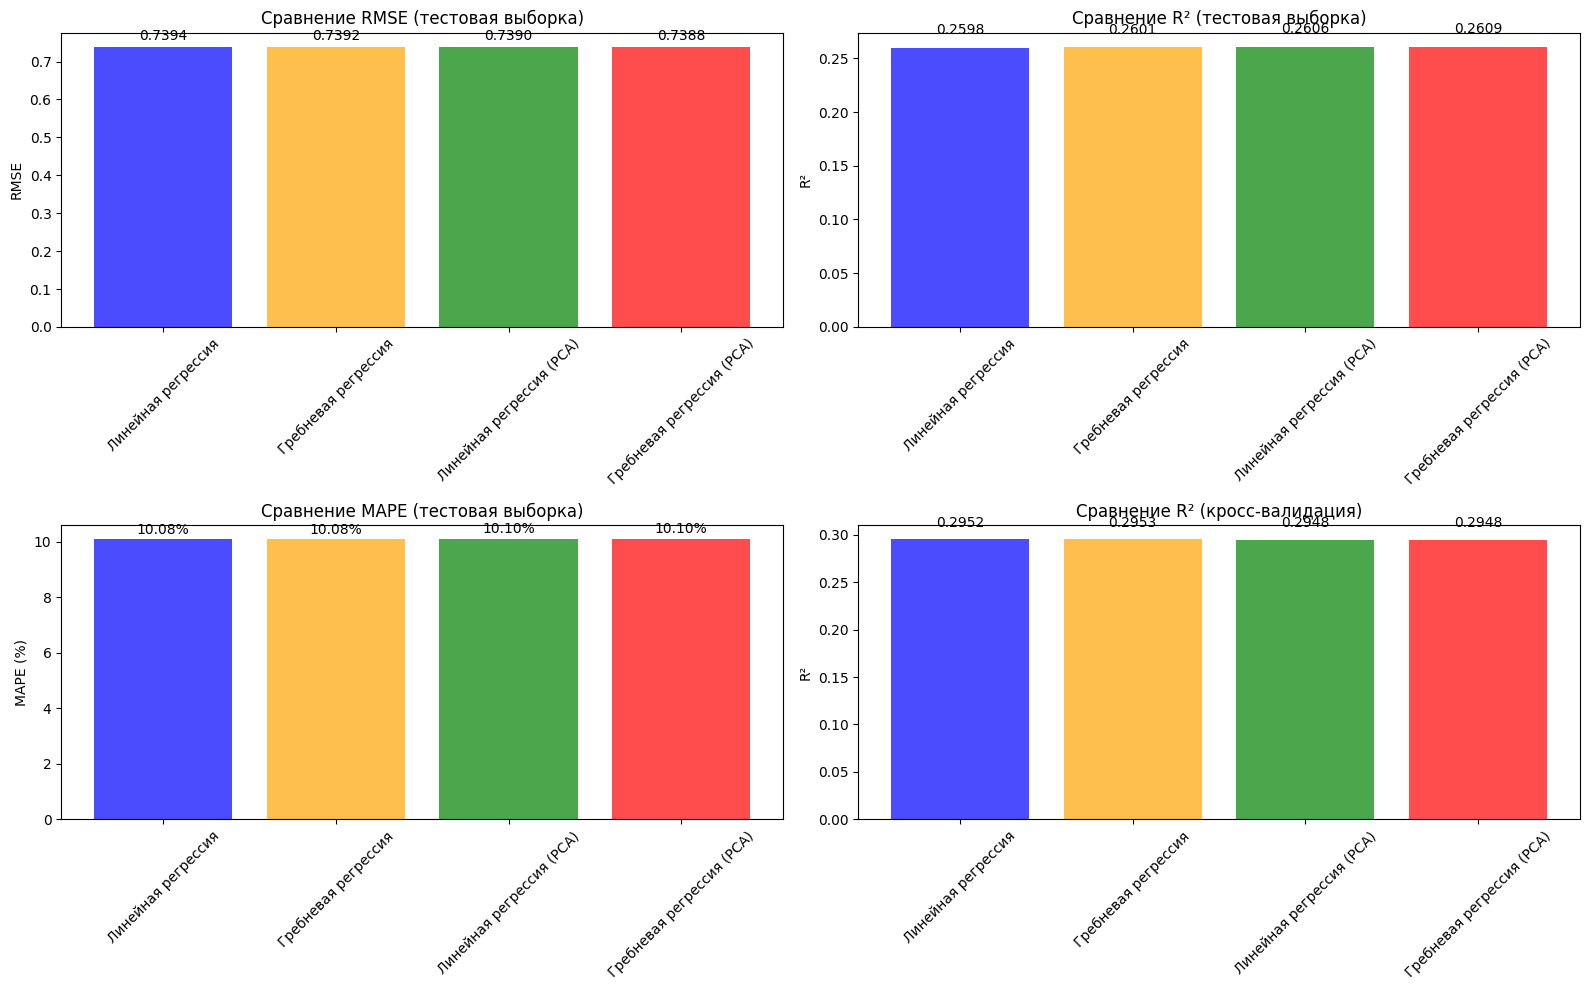


7. АНАЛИЗ ГЛАВНЫХ КОМПОНЕНТ
------------------------------
Нагрузки признаков на первые 3 главные компоненты:
                        PC1    PC2    PC3
fixed.acidity        -0.241  0.330  0.432
volatile.acidity     -0.370  0.126 -0.308
citric.acid           0.142  0.181  0.599
residual.sugar        0.355  0.337 -0.158
chlorides            -0.289  0.314 -0.012
free.sulfur.dioxide   0.429  0.061 -0.110
total.sulfur.dioxide  0.489  0.078 -0.097
density              -0.035  0.589 -0.173
pH                   -0.215 -0.147 -0.458
sulphates            -0.302  0.194  0.072
alcohol              -0.118 -0.462  0.260


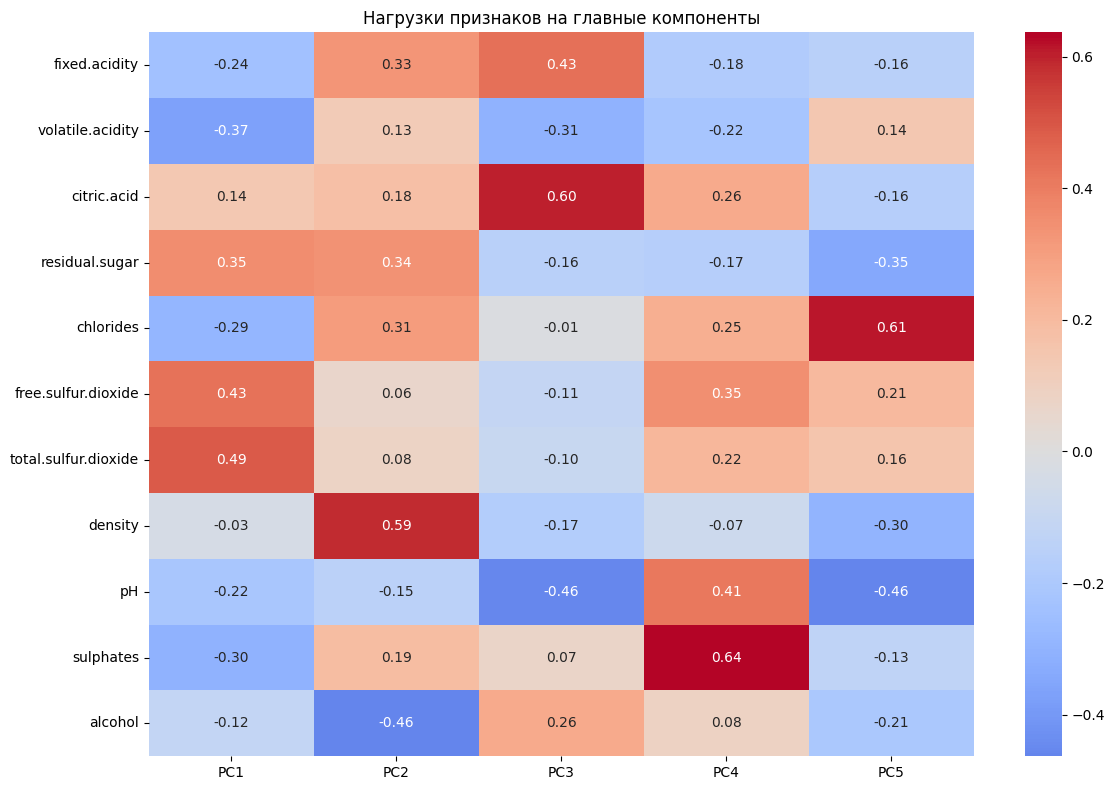


ИТОГОВЫЕ ВЫВОДЫ:
Лучшая модель: Гребневая регрессия (PCA)
R² на тестовой выборке: 0.2609
MAPE: 10.10%
Сокращение размерности: 11 -> 9 признаков
Сохранено дисперсии: 97.7%

Эффективность PCA:
PCA улучшило качество на 0.0008 по R²


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

print("АНАЛИЗ МЕТОДОМ ГЛАВНЫХ КОМПОНЕНТ (PCA)")
print("=" * 50)

# 1. Стандартизация данных перед PCA
print("1. СТАНДАРТИЗАЦИЯ ДАННЫХ")
print("-" * 30)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Данные стандартизированы (среднее=0, std=1)")

# 2. Применение PCA
print("\n2. ПРИМЕНЕНИЕ PCA")
print("-" * 30)

pca = PCA()
X_pca = pca.fit(X_train_scaled)

# Анализ объясненной дисперсии
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Объясненная дисперсия по компонентам:")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"Компонента {i+1}: {var:.3f} (Накопленно: {cum_var:.3f})")

# Определение оптимального числа компонент (объясняют 95% дисперсии)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nКоличество компонент для 95% дисперсии: {n_components_95}")

# Визуализация графика каменистой осыпи
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-', linewidth=2)
plt.axhline(y=0.05, color='r', linestyle='--', label='Порог 5%')
plt.title('Объясненная дисперсия по компонентам')
plt.xlabel('Номер компоненты')
plt.ylabel('Доля объясненной дисперсии')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'go-', linewidth=2)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% дисперсии')
plt.axvline(x=n_components_95, color='orange', linestyle=':', label=f'{n_components_95} компонент')
plt.title('Накопленная объясненная дисперсия')
plt.xlabel('Количество компонент')
plt.ylabel('Накопленная дисперсия')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Повторное моделирование на главных компонентах
print("\n3. МОДЕЛИРОВАНИЕ НА ГЛАВНЫХ КОМПОНЕНТАХ")
print("-" * 40)

# Используем оптимальное число компонент
pca_optimal = PCA(n_components=n_components_95)
X_train_pca = pca_optimal.fit_transform(X_train_scaled)
X_test_pca = pca_optimal.transform(X_test_scaled)

print(f"Исходная размерность: {X_train.shape[1]}")
print(f"Размерность после PCA: {X_train_pca.shape[1]}")
print(f"Сохранено дисперсии: {pca_optimal.explained_variance_ratio_.sum():.3f}")

# Линейная регрессия на PCA
print("\n4. ЛИНЕЙНАЯ РЕГРЕССИЯ НА PCA")
print("-" * 30)

linear_pca = LinearRegression()
linear_pca_results = evaluate_model(linear_pca, X_train_pca, X_test_pca, y_train, y_test, 
                                   "Линейная регрессия (PCA)")

# Гребневая регрессия на PCA
print("\n5. ГРЕБНЕВАЯ РЕГРЕССИЯ НА PCA")
print("-" * 30)

ridge_cv_pca = RidgeCV(alphas=alphas, cv=5)
ridge_cv_pca.fit(X_train_pca, y_train)

ridge_pca = Ridge(alpha=ridge_cv_pca.alpha_)
ridge_pca_results = evaluate_model(ridge_pca, X_train_pca, X_test_pca, y_train, y_test, 
                                  "Гребневая регрессия (PCA)")

# 6. Сравнение всех моделей
print("\n6. СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ")
print("=" * 40)

# Собираем все результаты
all_results = [linear_results, ridge_results, linear_pca_results, ridge_pca_results]
all_results_df = pd.DataFrame(all_results)
all_results_df = all_results_df.set_index('model')

print("Сравнение метрик на тестовой выборке:")
comparison_all = all_results_df[['rmse_test', 'r2_test', 'mape_test', 'cv_mean']].round(4)
print(comparison_all)

# Визуализация сравнения всех моделей
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# RMSE сравнение
models = all_results_df.index
rmse_values = all_results_df['rmse_test']
colors = ['blue', 'orange', 'green', 'red']
axes[0,0].bar(models, rmse_values, color=colors, alpha=0.7)
axes[0,0].set_title('Сравнение RMSE (тестовая выборка)')
axes[0,0].set_ylabel('RMSE')
axes[0,0].tick_params(axis='x', rotation=45)
for i, v in enumerate(rmse_values):
    axes[0,0].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

# R² сравнение
r2_values = all_results_df['r2_test']
axes[0,1].bar(models, r2_values, color=colors, alpha=0.7)
axes[0,1].set_title('Сравнение R² (тестовая выборка)')
axes[0,1].set_ylabel('R²')
axes[0,1].tick_params(axis='x', rotation=45)
for i, v in enumerate(r2_values):
    axes[0,1].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

# MAPE сравнение
mape_values = all_results_df['mape_test']
axes[1,0].bar(models, mape_values, color=colors, alpha=0.7)
axes[1,0].set_title('Сравнение MAPE (тестовая выборка)')
axes[1,0].set_ylabel('MAPE (%)')
axes[1,0].tick_params(axis='x', rotation=45)
for i, v in enumerate(mape_values):
    axes[1,0].text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom')

# Кросс-валидация сравнение
cv_values = all_results_df['cv_mean']
axes[1,1].bar(models, cv_values, color=colors, alpha=0.7)
axes[1,1].set_title('Сравнение R² (кросс-валидация)')
axes[1,1].set_ylabel('R²')
axes[1,1].tick_params(axis='x', rotation=45)
for i, v in enumerate(cv_values):
    axes[1,1].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 7. Анализ главных компонент
print("\n7. АНАЛИЗ ГЛАВНЫХ КОМПОНЕНТ")
print("-" * 30)

# Нагрузки признаков на главные компоненты
loadings = pca_optimal.components_.T
loadings_df = pd.DataFrame(loadings, 
                          index=numeric_columns,
                          columns=[f'PC{i+1}' for i in range(n_components_95)])

print("Нагрузки признаков на первые 3 главные компоненты:")
print(loadings_df.iloc[:, :3].round(3))

# Визуализация нагрузок
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df.iloc[:, :min(5, n_components_95)], 
            annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Нагрузки признаков на главные компоненты')
plt.tight_layout()
plt.show()

print("\nИТОГОВЫЕ ВЫВОДЫ:")
print("=" * 50)
best_model_overall = all_results_df.loc[all_results_df['r2_test'].idxmax()]
print(f"Лучшая модель: {best_model_overall.name}")
print(f"R² на тестовой выборке: {best_model_overall['r2_test']:.4f}")
print(f"MAPE: {best_model_overall['mape_test']:.2f}%")
print(f"Сокращение размерности: {X_train.shape[1]} -> {n_components_95} признаков")
print(f"Сохранено дисперсии: {pca_optimal.explained_variance_ratio_.sum():.1%}")

print("\nЭффективность PCA:")
pca_improvement = all_results_df.loc['Гребневая регрессия (PCA)', 'r2_test'] - all_results_df.loc['Гребневая регрессия', 'r2_test']
if pca_improvement > 0:
    print(f"PCA улучшило качество на {pca_improvement:.4f} по R²")
else:
    print(f"PCA не улучшило качество модели")

Выполним Сравнение моделей - до/после PCA

ФИНАЛЬНОЕ СРАВНЕНИЕ МОДЕЛЕЙ: ДО И ПОСЛЕ PCA
СВОДНАЯ ТАБЛИЦА СРАВНЕНИЯ МОДЕЛЕЙ:
                           rmse_test  r2_test  mape_test  cv_mean  Размерность
model                                                                         
Линейная регрессия            0.7394   0.2598    10.0828   0.2952           11
Гребневая регрессия           0.7392   0.2601    10.0823   0.2953           11
Линейная регрессия (PCA)      0.7390   0.2606    10.0973   0.2948            9
Гребневая регрессия (PCA)     0.7388   0.2609    10.0966   0.2948            9

АНАЛИЗ ИЗМЕНЕНИЙ ПОСЛЕ ПРИМЕНЕНИЯ PCA:

Изменения для ЛИНЕЙНОЙ РЕГРЕССИИ после PCA:
RMSE: -0.0004 (↑ УЛУЧШЕНИЕ)
R²: +0.0009 (↑ УЛУЧШЕНИЕ)
MAPE: +0.0145 (↓ УХУДШЕНИЕ)

Изменения для ГРЕБНЕВОЙ РЕГРЕССИИ после PCA:
RMSE: -0.0004 (↑ УЛУЧШЕНИЕ)
R²: +0.0008 (↑ УЛУЧШЕНИЕ)
MAPE: +0.0143 (↓ УХУДШЕНИЕ)


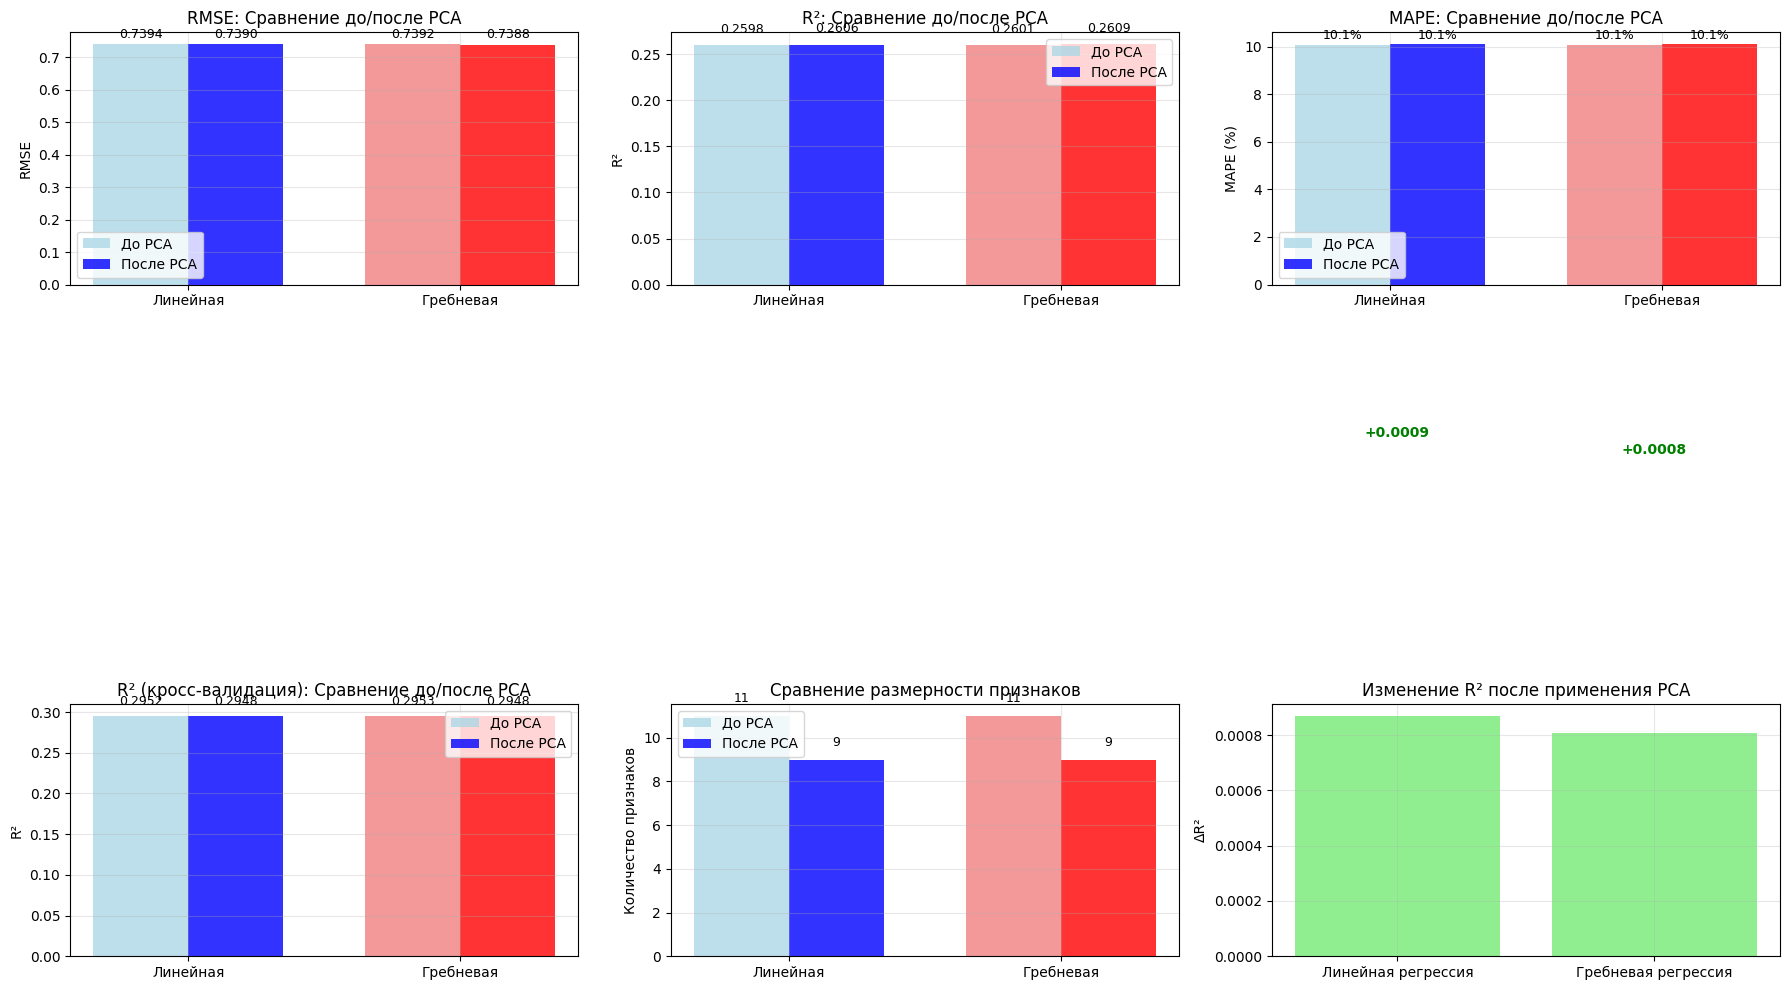


ФИНАЛЬНЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ:
ЛУЧШАЯ МОДЕЛЬ: Гребневая регрессия (PCA)
   - R² на тестовой выборке: 0.2609
   - MAPE: 10.10%
   - Размерность: 9 признаков

ЭФФЕКТИВНОСТЬ PCA:
   - Сокращение размерности: 11 → 9 признаков (-18.2%)
   - Сохранено дисперсии: 97.7%
PCA УСПЕШНО: улучшено качество моделей при сокращении размерности


In [12]:
print("ФИНАЛЬНОЕ СРАВНЕНИЕ МОДЕЛЕЙ: ДО И ПОСЛЕ PCA")
print("=" * 60)

# Создаем сводную таблицу для сравнения
comparison_summary = all_results_df[['rmse_test', 'r2_test', 'mape_test', 'cv_mean']].copy()

# Добавляем информацию о размерности
comparison_summary['Размерность'] = [X_train.shape[1], X_train.shape[1], 
                                    n_components_95, n_components_95]

print("СВОДНАЯ ТАБЛИЦА СРАВНЕНИЯ МОДЕЛЕЙ:")
print("=" * 80)
print(comparison_summary.round(4))

# Анализ изменений
print("\nАНАЛИЗ ИЗМЕНЕНИЙ ПОСЛЕ ПРИМЕНЕНИЯ PCA:")
print("=" * 50)

# Сравнение линейной регрессии
linear_change = {
    'RMSE': comparison_summary.loc['Линейная регрессия (PCA)', 'rmse_test'] - comparison_summary.loc['Линейная регрессия', 'rmse_test'],
    'R²': comparison_summary.loc['Линейная регрессия (PCA)', 'r2_test'] - comparison_summary.loc['Линейная регрессия', 'r2_test'],
    'MAPE': comparison_summary.loc['Линейная регрессия (PCA)', 'mape_test'] - comparison_summary.loc['Линейная регрессия', 'mape_test']
}

# Сравнение гребневой регрессии
ridge_change = {
    'RMSE': comparison_summary.loc['Гребневая регрессия (PCA)', 'rmse_test'] - comparison_summary.loc['Гребневая регрессия', 'rmse_test'],
    'R²': comparison_summary.loc['Гребневая регрессия (PCA)', 'r2_test'] - comparison_summary.loc['Гребневая регрессия', 'r2_test'],
    'MAPE': comparison_summary.loc['Гребневая регрессия (PCA)', 'mape_test'] - comparison_summary.loc['Гребневая регрессия', 'mape_test']
}

print("\nИзменения для ЛИНЕЙНОЙ РЕГРЕССИИ после PCA:")
for metric, change in linear_change.items():
    trend = "↑ УЛУЧШЕНИЕ" if (metric == 'R²' and change > 0) or (metric in ['RMSE', 'MAPE'] and change < 0) else "↓ УХУДШЕНИЕ"
    print(f"{metric}: {change:+.4f} ({trend})")

print("\nИзменения для ГРЕБНЕВОЙ РЕГРЕССИИ после PCA:")
for metric, change in ridge_change.items():
    trend = "↑ УЛУЧШЕНИЕ" if (metric == 'R²' and change > 0) or (metric in ['RMSE', 'MAPE'] and change < 0) else "↓ УХУДШЕНИЕ"
    print(f"{metric}: {change:+.4f} ({trend})")

# Визуализация сравнения до/после PCA
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Данные для группировки
models_before = ['Линейная регрессия', 'Гребневая регрессия']
models_after = ['Линейная регрессия (PCA)', 'Гребневая регрессия (PCA)']
colors_before = ['lightblue', 'lightcoral']
colors_after = ['blue', 'red']

# RMSE сравнение
x_pos = np.arange(len(models_before))
width = 0.35

rmse_before = [comparison_summary.loc[model, 'rmse_test'] for model in models_before]
rmse_after = [comparison_summary.loc[model, 'rmse_test'] for model in models_after]

axes[0,0].bar(x_pos - width/2, rmse_before, width, label='До PCA', color=colors_before, alpha=0.8)
axes[0,0].bar(x_pos + width/2, rmse_after, width, label='После PCA', color=colors_after, alpha=0.8)
axes[0,0].set_title('RMSE: Сравнение до/после PCA')
axes[0,0].set_ylabel('RMSE')
axes[0,0].set_xticks(x_pos)
axes[0,0].set_xticklabels(['Линейная', 'Гребневая'])
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Добавление значений на столбцы
for i, (before, after) in enumerate(zip(rmse_before, rmse_after)):
    axes[0,0].text(i - width/2, before + 0.01, f'{before:.4f}', ha='center', va='bottom', fontsize=9)
    axes[0,0].text(i + width/2, after + 0.01, f'{after:.4f}', ha='center', va='bottom', fontsize=9)

# R² сравнение
r2_before = [comparison_summary.loc[model, 'r2_test'] for model in models_before]
r2_after = [comparison_summary.loc[model, 'r2_test'] for model in models_after]

axes[0,1].bar(x_pos - width/2, r2_before, width, label='До PCA', color=colors_before, alpha=0.8)
axes[0,1].bar(x_pos + width/2, r2_after, width, label='После PCA', color=colors_after, alpha=0.8)
axes[0,1].set_title('R²: Сравнение до/после PCA')
axes[0,1].set_ylabel('R²')
axes[0,1].set_xticks(x_pos)
axes[0,1].set_xticklabels(['Линейная', 'Гребневая'])
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

for i, (before, after) in enumerate(zip(r2_before, r2_after)):
    axes[0,1].text(i - width/2, before + 0.01, f'{before:.4f}', ha='center', va='bottom', fontsize=9)
    axes[0,1].text(i + width/2, after + 0.01, f'{after:.4f}', ha='center', va='bottom', fontsize=9)

# MAPE сравнение
mape_before = [comparison_summary.loc[model, 'mape_test'] for model in models_before]
mape_after = [comparison_summary.loc[model, 'mape_test'] for model in models_after]

axes[0,2].bar(x_pos - width/2, mape_before, width, label='До PCA', color=colors_before, alpha=0.8)
axes[0,2].bar(x_pos + width/2, mape_after, width, label='После PCA', color=colors_after, alpha=0.8)
axes[0,2].set_title('MAPE: Сравнение до/после PCA')
axes[0,2].set_ylabel('MAPE (%)')
axes[0,2].set_xticks(x_pos)
axes[0,2].set_xticklabels(['Линейная', 'Гребневая'])
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

for i, (before, after) in enumerate(zip(mape_before, mape_after)):
    axes[0,2].text(i - width/2, before + 0.1, f'{before:.1f}%', ha='center', va='bottom', fontsize=9)
    axes[0,2].text(i + width/2, after + 0.1, f'{after:.1f}%', ha='center', va='bottom', fontsize=9)

# Кросс-валидация сравнение
cv_before = [comparison_summary.loc[model, 'cv_mean'] for model in models_before]
cv_after = [comparison_summary.loc[model, 'cv_mean'] for model in models_after]

axes[1,0].bar(x_pos - width/2, cv_before, width, label='До PCA', color=colors_before, alpha=0.8)
axes[1,0].bar(x_pos + width/2, cv_after, width, label='После PCA', color=colors_after, alpha=0.8)
axes[1,0].set_title('R² (кросс-валидация): Сравнение до/после PCA')
axes[1,0].set_ylabel('R²')
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels(['Линейная', 'Гребневая'])
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

for i, (before, after) in enumerate(zip(cv_before, cv_after)):
    axes[1,0].text(i - width/2, before + 0.01, f'{before:.4f}', ha='center', va='bottom', fontsize=9)
    axes[1,0].text(i + width/2, after + 0.01, f'{after:.4f}', ha='center', va='bottom', fontsize=9)

# Изменение размерности
dimension_before = [X_train.shape[1], X_train.shape[1]]
dimension_after = [n_components_95, n_components_95]

axes[1,1].bar(x_pos - width/2, dimension_before, width, label='До PCA', color=colors_before, alpha=0.8)
axes[1,1].bar(x_pos + width/2, dimension_after, width, label='После PCA', color=colors_after, alpha=0.8)
axes[1,1].set_title('Сравнение размерности признаков')
axes[1,1].set_ylabel('Количество признаков')
axes[1,1].set_xticks(x_pos)
axes[1,1].set_xticklabels(['Линейная', 'Гребневая'])
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

for i, (before, after) in enumerate(zip(dimension_before, dimension_after)):
    axes[1,1].text(i - width/2, before + 0.5, f'{before}', ha='center', va='bottom', fontsize=9)
    axes[1,1].text(i + width/2, after + 0.5, f'{after}', ha='center', va='bottom', fontsize=9)

# Общий вывод по эффективности
efficiency = []
for i, model in enumerate(models_before):
    r2_change = r2_after[i] - r2_before[i]
    efficiency.append(r2_change)

axes[1,2].bar(models_before, efficiency, color=['lightgreen' if eff > 0 else 'lightcoral' for eff in efficiency])
axes[1,2].set_title('Изменение R² после применения PCA')
axes[1,2].set_ylabel('ΔR²')
axes[1,2].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1,2].grid(True, alpha=0.3)

for i, eff in enumerate(efficiency):
    color = 'green' if eff > 0 else 'red'
    axes[1,2].text(i, eff + (0.001 if eff > 0 else -0.002), f'{eff:+.4f}', 
                   ha='center', va='bottom' if eff > 0 else 'top', color=color, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ФИНАЛЬНЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ:")
print("="*80)

best_model_name = comparison_summary['r2_test'].idxmax()
best_r2 = comparison_summary.loc[best_model_name, 'r2_test']
best_mape = comparison_summary.loc[best_model_name, 'mape_test']

print(f"ЛУЧШАЯ МОДЕЛЬ: {best_model_name}")
print(f"   - R² на тестовой выборке: {best_r2:.4f}")
print(f"   - MAPE: {best_mape:.2f}%")
print(f"   - Размерность: {n_components_95 if 'PCA' in best_model_name else X_train.shape[1]} признаков")

print("\nЭФФЕКТИВНОСТЬ PCA:")
print(f"   - Сокращение размерности: {X_train.shape[1]} → {n_components_95} признаков (-{(1 - n_components_95/X_train.shape[1])*100:.1f}%)")
print(f"   - Сохранено дисперсии: {pca_optimal.explained_variance_ratio_.sum():.1%}")

pca_success = any(eff > 0 for eff in efficiency)
if pca_success:
    print("PCA УСПЕШНО: улучшено качество моделей при сокращении размерности")
else:
    print("PCA НЕ УЛУЧШИЛО качество, но сократило размерность")